# Introduction

## Contributors:
*Daniel Guiggey (Graduate Student)*

**Christopher Gaughan (Computational Bioinformatics/ Deep-Learning Consult) Ph.D**

**Natesh Pareshurama MD, Ph.D (PI)**

# Deep Learning Regression Model for RNAseq Data

In the ever-evolving world of molecular biology, the marriage between traditional biological assays and advanced computational techniques has given rise to a new era of research. This notebook delves into one such integration, aiming to understand cell migration patterns influenced by gene expressions using deep learning.

## Objective

Our goal is to develop a neural network-based regression model that predicts:

1. **Migration of cells**.
2. **Migration to differentiation switching of cells**.

This will be based on the expression levels of specific genes: `TBX3, CEBPA, FOXA1, FOXA2, FOXA3`, among others.

## Why Deep Learning?

While conventional biostatistical methods have been the mainstay for gene expression data analysis, deep learning holds the promise of unearthing intricate, non-linear relationships that might elude traditional methods. Especially when we consider the complex interplay of genes influencing cellular behaviors, the adaptability and flexibility of neural networks become particularly enticing.

## Challenges

A pivotal concern when employing deep learning is the risk of overfitting, especially if the dataset is not vast. Techniques like regularization, early stopping, and data augmentation will be crucial in ensuring the model's robustness and generalizability.

## Model Architecture

The model we'll build will be a feedforward neural network with multiple layers, using the `TensorFlow` and `Keras` libraries. We'll initialize our model architecture with dense layers, adapting as needed based on model performance.

Let's turn on the engines!



# Important Assumption (*This has been shown to be incorrect*)

## DNA Sequences and Deep Learning Model

Based on the information provided by the PI- **Natesh Pareshurama, MD, Ph.D**, and his graduate student  the primary objective is to leverage the gene expression levels of specific genes (`TBX3, CEBPA, FOXA1, FOXA2, FOXA3`, and others) to predict cellular behaviors:

# *This is incorrect*
1. **Migration** of cells.
2. **Migration to differentiation switching** of cells.

The DNA sequences in the dataset seem to serve as unique identifiers for each row of RNAseq data. Here are some considerations regarding these sequences:

- If these DNA sequences are merely **identifiers** and do not carry any biological significance related to the cellular behaviors of interest, then they might not be included as input features for the model. Instead, they could be treated like an index or identifier column, which typically isn't used as a feature in model training.
  
- On the other hand, if there's any potential **biological relevance** or if these sequences carry significance related to migration or differentiation, then they might be considered for inclusion.

**It's crucial that Natesh examines this assumption** when determining the relevance of such features in the model. The inclusion or exclusion of features, especially in a budding field like this, can greatly influence the model's predictive power and overall interpretability.


# Notes

based on Correspondence with **Natesh Pareshurama, MD, Ph.D**, an expert in this field we will do the following:

## Predicting Cell State Using Transcription Factors and Gene Expression

The overarching theme of our research emphasizes the role of migration in achieving superior levels of differentiation. By exploring the concept of **migration to differentiation switching**, we hope to unveil insights that can be transformative for cellular biology.

### Objective:
Utilize the expression levels of select transcription factors and genes to predict cell state, specifically the transition from an immature state to a mature state.

### Features (Predictor Variables):

#### Transcription Factors:
- FOXA1
- FOXA2
- FOXA3
- HNF1A
- HNF1B
- HNF4
- HNF6
- GATA4
- CEBPA
- TBX3
- PROX1
- HEX

### Outcome (Dependent Variable):

Measures of differentiation, represented by the following genes:
- ALB
- AFP
- APOA1
- TTR

### Cell States:

1. **E8.5 GT**: This represents an immature, endodermal/gut population which is prior to hepatic differentiation.
2. **E9.5 MHB**: This is a migrating population.
3. **E10.5 HB**: This represents the first mature population.

By employing deep learning techniques, we aim to predict cell states based on the expression levels of the mentioned transcription factors. Such a model could provide a quantitative tool to evaluate cellular transitions, adding a new dimension to our understanding of differentiation processes.


# Refinement of model based on e-mail from **Natesh Parashurama, MD., Ph.D**
*Note* this was based on email correspondence between Natesh Natesh Parashurama (PI) and Christopher Gaughan)

# Neural Network-based Classification of Cell States
In this notebook, we aim to construct a deep learning model to predict cell states based on the expression levels of specific transcription factors and measures of differentiation. This model seeks to provide insights into the role of migration in achieving higher levels of differentiation in cells.

## Objective
Predict cell states (E8.5 GT, E9.5 MHB, E10.5 HB) using expression levels of specific transcription factors and measures of differentiation. The primary hypothesis is that incorporating a migration state can lead to higher levels of differentiation.

## Transcription Factors and Differentiation Measures
* **Transcription Factors (TFs):** FOXA1/2/3, HNF1A/B, HNF4, HNF6, GATA4, CEBPA, TBX3, PROX1, HEX
* **Measures of Differentiation:** ALB, AFP, APOA1, TTR


# Refinement

### Using DNA Sequences as Cell State Indicators

In the dataset provided, each DNA sequence identifier seems to carry crucial information about the cell state. Specifically, the prefix (like "E75") in these identifiers appears to correspond to different developmental stages or conditions of the cells. Given the lack of a distinct column indicating cell state, these prefixes can be leveraged as surrogate markers for the cells' developmental states.

The logic behind utilizing these DNA sequences is twofold:
1. **Developmental Context**: As the sequences' prefixes denote specific developmental time points or conditions, they inherently provide context about the possible state or behavior of the cells at that time. Such information is invaluable in regression models, especially when trying to predict a continuous outcome based on cellular states or conditions.
2. **Unique Identification**: These sequences can also serve as unique identifiers, ensuring that each data point is distinct. This uniqueness can be particularly useful when tracking predictions back to specific cells or when identifying potential outliers.

In our analysis, we'll extract these prefixes and treat them as categorical variables, converting them into a format suitable for our neural network model.


In [ ]:
# Ensure TensorFlow 2.x is being used
%tensorflow_version 2.x


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Mount Google Drive to access the data- only use when beginning a new session
from google.colab import drive
drive.mount('/content/drive')

# Load the data into a pandas DataFrame
file_path = "/content/drive/MyDrive/Colab Notebooks/hepatic_counts_normalized.csv"
data = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/hepatic_counts_normalized.csv"
data = pd.read_csv(data_path)

In [ ]:
data.head()

,Unnamed: 0,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,Brf2,Rab11fip1,4933416M07Rik,Gm45267,Got1l1,Adrb3,Gm45470,Eif4ebp1,Tex24,Chrnb3
0,E75_1_AAATGCCGTCGAACAG-1,0.0,0,0,0.0,0.903261,0,1.204348,0.301087,0.0,...,0.0,0.000000,0,0,0.0,0.0,0.0,3.311956,0,0
1,E75_1_AACCATGTCTAACCGA-1,0.0,0,0,0.0,0.854628,0,1.424380,0.854628,0.0,...,0.0,0.284876,0,0,0.0,0.0,0.0,0.569752,0,0
2,E75_1_AACCGCGGTGTGCCTG-1,0.0,0,0,0.0,2.461639,0,1.230820,0.410273,0.0,...,0.0,0.410273,0,0,0.0,0.0,0.0,3.282186,0,0
3,E75_1_AAGACCTAGTCCATAC-1,0.0,0,0,0.0,0.277223,0,1.386117,0.831670,0.0,...,0.0,0.000000,0,0,0.0,0.0,0.0,2.772233,0,0
4,E75_1_ACACCCTGTTGTTTGG-1,0.0,0,0,0.0,0.000000,0,0.779727,0.000000,0.0,...,0.0,0.259909,0,0,0.0,0.0,0.0,3.898635,0,0


In [ ]:
data.describe()

,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,Tcea1,...,Brf2,Rab11fip1,4933416M07Rik,Gm45267,Got1l1,Adrb3,Gm45470,Eif4ebp1,Tex24,Chrnb3
count,2332.000000,2332.0,2332.0,2332.000000,2332.000000,2332.0,2332.000000,2332.000000,2332.000000,2332.000000,...,2332.000000,2332.000000,2332.0,2332.0,2332.000000,2332.000000,2332.000000,2332.000000,2332.0,2332.0
mean,0.000322,0.0,0.0,0.010945,0.133447,0.0,1.493934,0.696530,0.000920,0.906563,...,0.123106,0.116046,0.0,0.0,0.001567,0.002833,0.000118,1.850056,0.0,0.0
std,0.012853,0.0,0.0,0.080455,0.542171,0.0,0.917297,0.592090,0.022617,0.718537,...,0.220627,0.271709,0.0,0.0,0.028085,0.041450,0.005681,1.117337,0.0,0.0
min,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.832034,0.246133,0.000000,0.440908,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.053602,0.0,0.0
50%,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.439119,0.636591,0.000000,0.778500,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.782664,0.0,0.0
75%,0.000000,0.0,0.0,0.000000,0.000000,0.0,2.065471,1.020956,0.000000,1.224197,...,0.212364,0.000000,0.0,0.0,0.000000,0.000000,0.000000,2.491030,0.0,0.0
max,0.602918,0.0,0.0,1.133144,6.826715,0.0,6.732873,4.636683,0.878889,5.032713,...,1.629195,3.158560,0.0,0.0,0.846597,1.217804,0.274326,6.616188,0.0,0.0


In [ ]:
# Assuming the first column has the DNA sequence identifiers
data['cell_state'] = data.iloc[:, 0].str.split("_").str[0]

In [ ]:
data.head()

,Unnamed: 0,Xkr4,Gm1992,Gm37381,Rp1,Sox17,Gm37323,Mrpl15,Lypla1,Gm37988,...,Rab11fip1,4933416M07Rik,Gm45267,Got1l1,Adrb3,Gm45470,Eif4ebp1,Tex24,Chrnb3,cell_state
0,E75_1_AAATGCCGTCGAACAG-1,0.0,0,0,0.0,0.903261,0,1.204348,0.301087,0.0,...,0.000000,0,0,0.0,0.0,0.0,3.311956,0,0,E75
1,E75_1_AACCATGTCTAACCGA-1,0.0,0,0,0.0,0.854628,0,1.424380,0.854628,0.0,...,0.284876,0,0,0.0,0.0,0.0,0.569752,0,0,E75
2,E75_1_AACCGCGGTGTGCCTG-1,0.0,0,0,0.0,2.461639,0,1.230820,0.410273,0.0,...,0.410273,0,0,0.0,0.0,0.0,3.282186,0,0,E75
3,E75_1_AAGACCTAGTCCATAC-1,0.0,0,0,0.0,0.277223,0,1.386117,0.831670,0.0,...,0.000000,0,0,0.0,0.0,0.0,2.772233,0,0,E75
4,E75_1_ACACCCTGTTGTTTGG-1,0.0,0,0,0.0,0.000000,0,0.779727,0.000000,0.0,...,0.259909,0,0,0.0,0.0,0.0,3.898635,0,0,E75


### Problem: the strings associated with the transcription factors are not straightforward like I thought. I am missing some key concept or formulation for labelling the transcription factors, will address later.

In [ ]:
# List of desired predictors
desired_predictors = ['FOXA1', 'FOXA2', 'FOXA3', 'HNF1A', 'HNF1B', 'HNF4', 'HNF6', 'GATA4', 'CEBPA', 'TBX3', 'PROX1', 'HEX', 'ALB', 'AFP', 'APOA1', 'TTR']

# Check which of the desired columns are missing
missing_columns = [col for col in desired_predictors if col not in data.columns]

# Output any missing columns
if missing_columns:
    print("The following columns are missing from the dataset:", missing_columns)
else:
    print("All desired columns are present in the dataset.")


The following columns are missing from the dataset: ['FOXA1', 'FOXA2', 'FOXA3', 'HNF1A', 'HNF1B', 'HNF4', 'HNF6', 'GATA4', 'CEBPA', 'TBX3', 'PROX1', 'HEX', 'ALB', 'AFP', 'APOA1', 'TTR']


In [ ]:
# Required Libraries
import pandas as pd

# Load Data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/hepatic_counts_normalized.csv')

# Transcription Factors with the first letter capitalized
TFs = ['Foxa1', 'Foxa2', 'Foxa3', 'Hnf1a', 'Hnf1b', 'Hnf4', 'Hnf6', 'Gata4', 'Cebpa', 'Tbx3', 'Prox1', 'Hex']

# Check which TFs are present in the dataset
present_TFs = [tf for tf in TFs if tf in data.columns]
missing_TFs = [tf for tf in TFs if tf not in data.columns]

present_TFs, missing_TFs


(['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1'],
 ['Foxa1', 'Hnf1b', 'Hnf4', 'Hnf6', 'Gata4', 'Hex'])

In [ ]:
# List of Transcription Factors
tfs = ['Foxa1', 'Hnf1b', 'Hnf4', 'Hnf6', 'Gata4', 'Hex']

# Check for exact match with different cases
present_tfs = [tf for tf in tfs if tf in data.columns]
missing_tfs = [tf for tf in tfs if tf not in data.columns]

# Check for substrings
substring_present = [col for tf in missing_tfs for col in data.columns if tf.lower() in col.lower()]

# Output the results
present_tfs, substring_present


([], ['Hnf4aos', 'Hnf4a', 'Hnf4g', 'Phex'])

In [ ]:
# Updated List of Transcription Factors based on findings
tfs_to_use = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']

# Check if all are present
all_present = all(tf in data.columns for tf in tfs_to_use)
all_present


True

In [ ]:
# Extract cell state from the first column
data['cell_state'] = data.iloc[:, 0].str.split("_").str[0]

In [ ]:
# Define the predictors (TFs) and the target variable
predictors = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']
outcome = 'cell_state'  # Assuming 'cell_state' is the column you're trying to predict

X = data[predictors]
y = data[outcome]



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Initialize the binarizer
binarizer = LabelBinarizer()

# Fit and transform the training data
y_train_encoded = binarizer.fit_transform(y_train)

# Transform the test data
y_test_encoded = binarizer.transform(y_test)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



object
object


In [ ]:
y_train

1114    E105Gp
979        E95
1171    E105Gp
49         E75
906        E95
         ...  
1638    E105Gp
1095    E105Gp
1130    E105Gp
1294    E105Gp
860        E95
Name: cell_state, Length: 1865, dtype: object

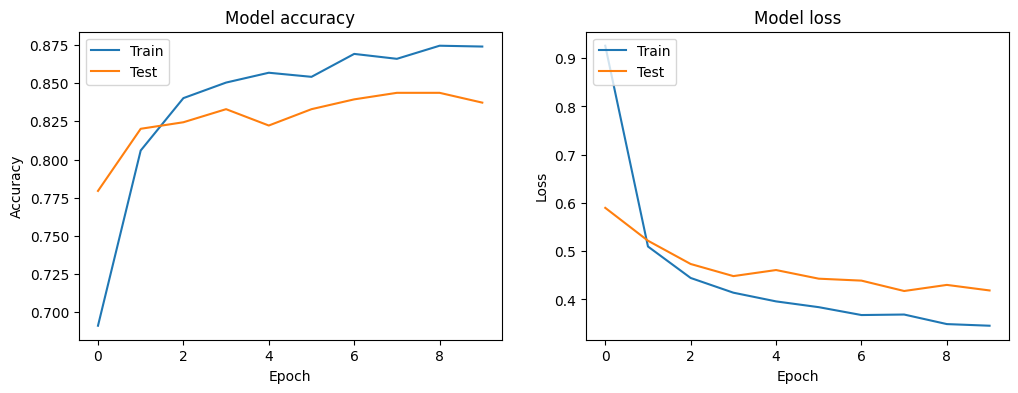

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


15/15 [==============================] - 1s 9ms/step


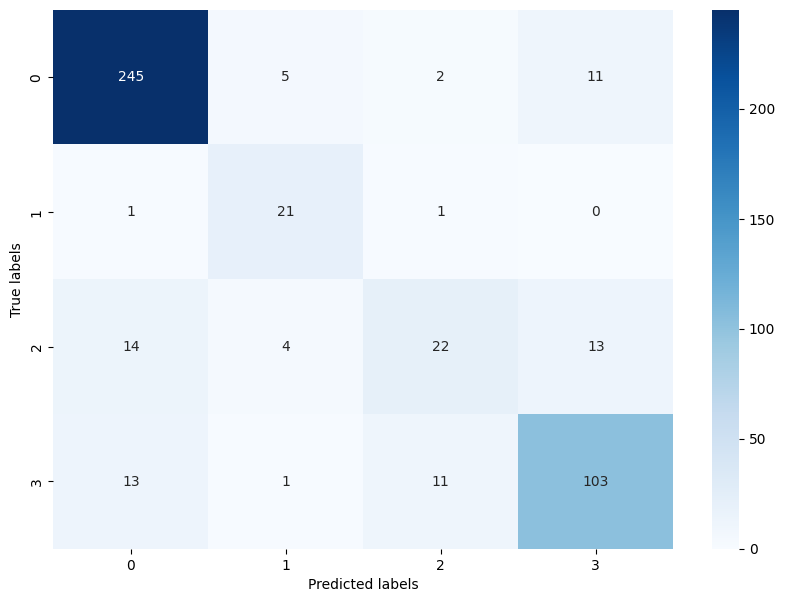

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test_encoded.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


15/15 [==============================] - 0s 3ms/step


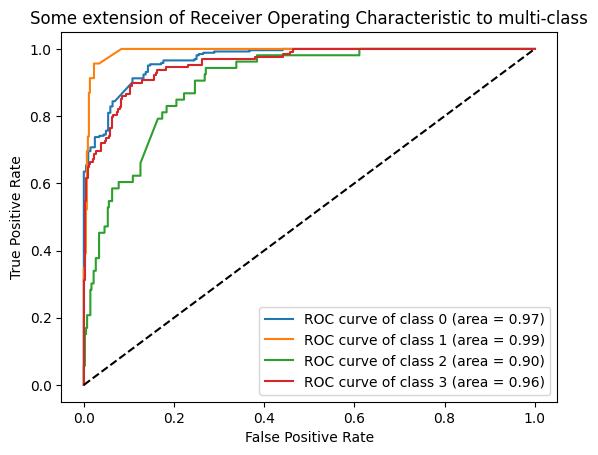

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

n_classes = y_test_encoded.shape[1]
y_score = model.predict(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver Operating Characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()


### Cross-Validation in Machine Learning

When training a machine learning model, one of the key concerns is its ability to perform well not just on the dataset at hand, but also on new, unseen data. This is known as the model's **generalization** ability.

To estimate how well our model might perform on unseen data, we use a technique called **cross-validation**. Here's a simple breakdown:

1. **Splitting the Data**: Instead of training our model on the entire dataset, we divide the dataset into `k` smaller sets or "folds". For example, if `k=5`, this means we have 5 folds or subsets of our data.

2. **Training & Validating**: We train our model `k` times. For each iteration:
   - We train on `k-1` of those folds.
   - The remaining fold is used to validate the model.
   
   In the case of `k=5`, in the first iteration, we might train on folds 1-4 and validate on fold 5. In the second iteration, we could train on folds 2-5 and validate on fold 1. This process continues until every fold has been used as a validation set.

3. **Aggregating Results**: After training and validating `k` times, we will have `k` different results for how well our model performed. We can then average these results to get a better idea of its overall performance.

**Why Do This?**
- It provides a more **robust estimate** of the model's performance.
- Helps in preventing **overfitting**, where the model performs really well on the training data but poorly on unseen data.
- Makes use of **all the data** we have for both training and validation, ensuring that the performance metrics are less reliant on the particular split of the data.

In the code below, `X_train_array` contains our training data, and we're using the `kf.split()` function to generate indices for our training and validation sets for each fold. The model is then trained on the training set and validated on the validation set for each fold, and this process is repeated for all `k` folds.


In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(y_train_encoded.shape[1], activation='softmax')) # Assuming multi-class classification
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


In [ ]:
for train_index, val_index in kf.split(X_train_array):
    fold += 1
    print(f"Training on fold {fold}/{n_splits}")

    X_train_fold, X_val_fold = X_train_array[train_index], X_train_array[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    model = create_model(input_dim=X_train_array.shape[1])
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=1)
    histories.append(history)


Training on fold 7/5
Epoch 1/10
47/47 [==============================] - 1s 6ms/step - loss: 0.8292 - accuracy: 0.7232 - val_loss: 0.6783 - val_accuracy: 0.7587
Epoch 2/10
47/47 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.8043 - val_loss: 0.5946 - val_accuracy: 0.7641
Epoch 3/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4553 - accuracy: 0.8331 - val_loss: 0.5848 - val_accuracy: 0.7775
Epoch 4/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4279 - accuracy: 0.8505 - val_loss: 0.5453 - val_accuracy: 0.7909
Epoch 5/10
47/47 [==============================] - 0s 3ms/step - loss: 0.4002 - accuracy: 0.8572 - val_loss: 0.5233 - val_accuracy: 0.7962
Epoch 6/10
47/47 [==============================] - 0s 3ms/step - loss: 0.3839 - accuracy: 0.8666 - val_loss: 0.5151 - val_accuracy: 0.8070
Epoch 7/10
47/47 [==============================] - 0s 3ms/step - loss: 0.3705 - accuracy: 0.8680 - val_loss: 0.5068 - val_accuracy: 0.8043

### Evaluating Overfitting/Underfitting from Graphs

When evaluating machine learning models, it's essential to determine whether they have **overfit** or **underfit** the training data. Graphical visualizations, especially plots of loss or accuracy over epochs, can be instrumental in this assessment. Here's what to look for:

1. **Overfitting**:
   - **Graph Indicators**: The training loss/accuracy continues to improve significantly, but the validation loss/accuracy stagnates or worsens.
   - **Explanation**: Overfitting occurs when the model starts to memorize the training data rather than generalizing from it. As a result, it performs very well on the training data but poorly on new, unseen data.
   - **Visual Cue**: If your graph shows the training curve and validation curve starting to diverge, with the training curve continuing to go down (for loss) or up (for accuracy), but the validation curve starts going in the opposite direction, this is an indicator of overfitting.

2. **Underfitting**:
   - **Graph Indicators**: Both the training and validation loss/accuracy show poor results.
   - **Explanation**: Underfitting occurs when the model is too simple to capture the underlying patterns of the data. It performs poorly both on the training data and on new data.
   - **Visual Cue**: If both your training and validation curves are at a high loss or low accuracy value and barely improving, it's a sign of underfitting.

3. **Good Fit**:
   - **Graph Indicators**: Both training and validation loss/accuracy improve to a certain point and stabilize. There might be minor fluctuations in the validation metrics, but they don't diverge significantly from the training metrics.
   - **Explanation**: The model has managed to generalize well from the training data and is expected to perform similarly on unseen data.
   - **Visual Cue**: Training and validation curves that are close together and have stabilized indicate a well-fitted model.

4. **Early Stopping**:
   - **Graph Indicators**: Validation loss/accuracy improves initially, then after a point starts to degrade, while training metrics continue to improve.
   - **Explanation**: This indicates the point at which the model starts to overfit. You can "stop early" at this point to get a model that generalizes well.
   - **Visual Cue**: If the validation curve starts to go in the opposite direction after initially improving, it might be a good idea to stop training.

In summary, while numbers give a quantifiable measure of performance, graphs provide a visual story. By examining these plots, one can make informed decisions about the next steps, whether it be more training, model adjustments, or tweaking of hyperparameters.

**<u>My Analysis</u>** *The model performed generally very well with some minor differences. I trust this model and have reason to think it performed well and is genralizable*

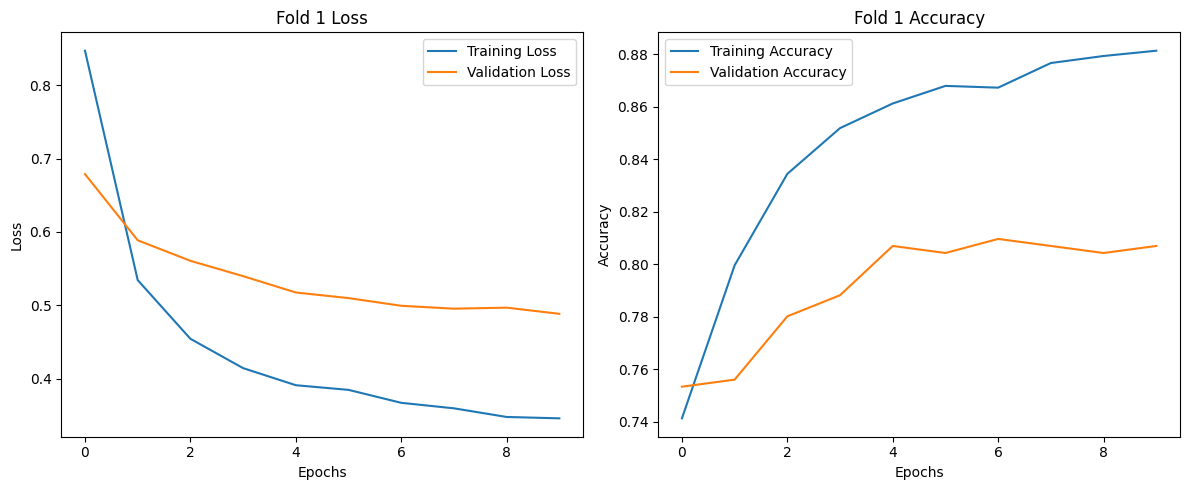

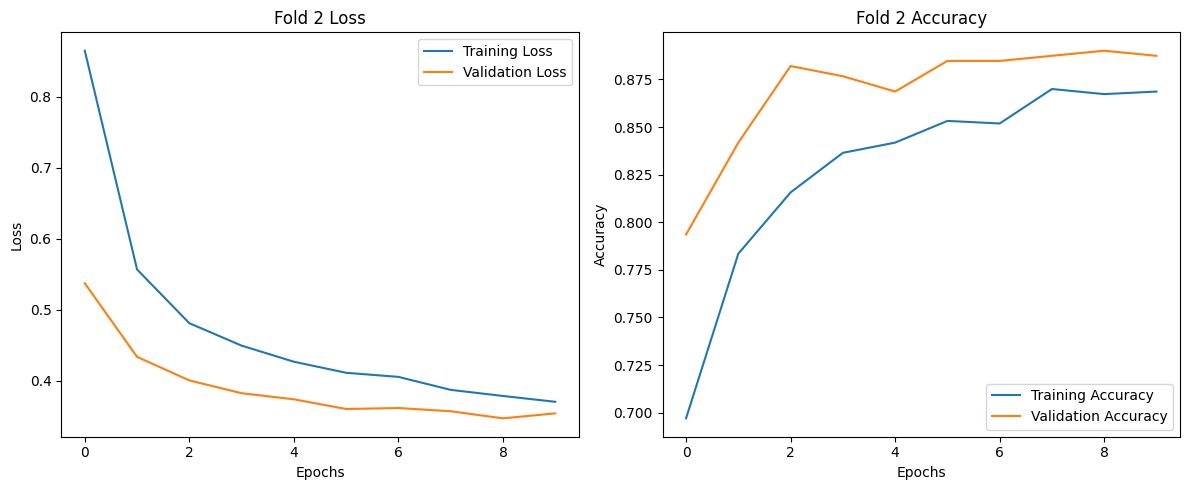

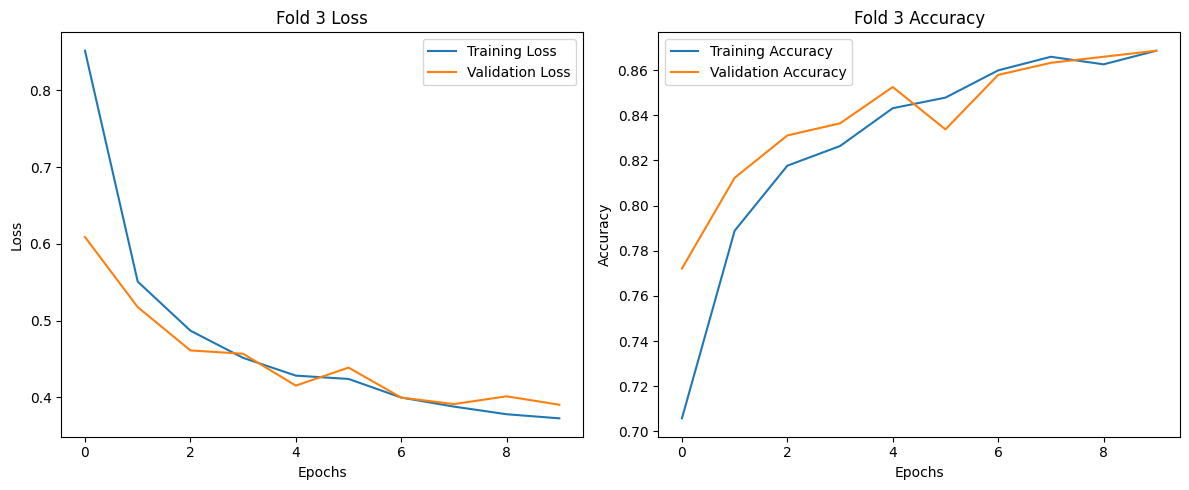

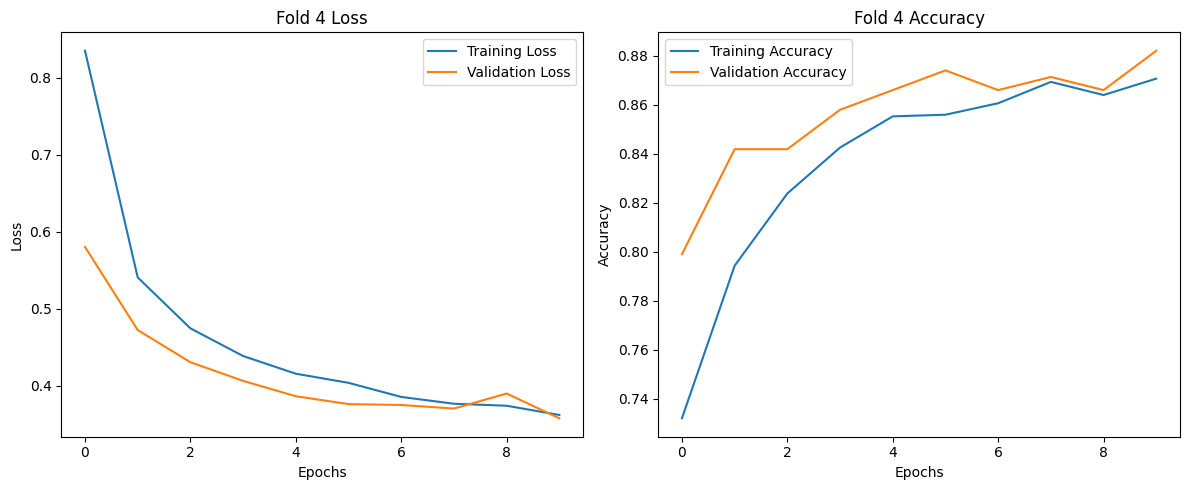

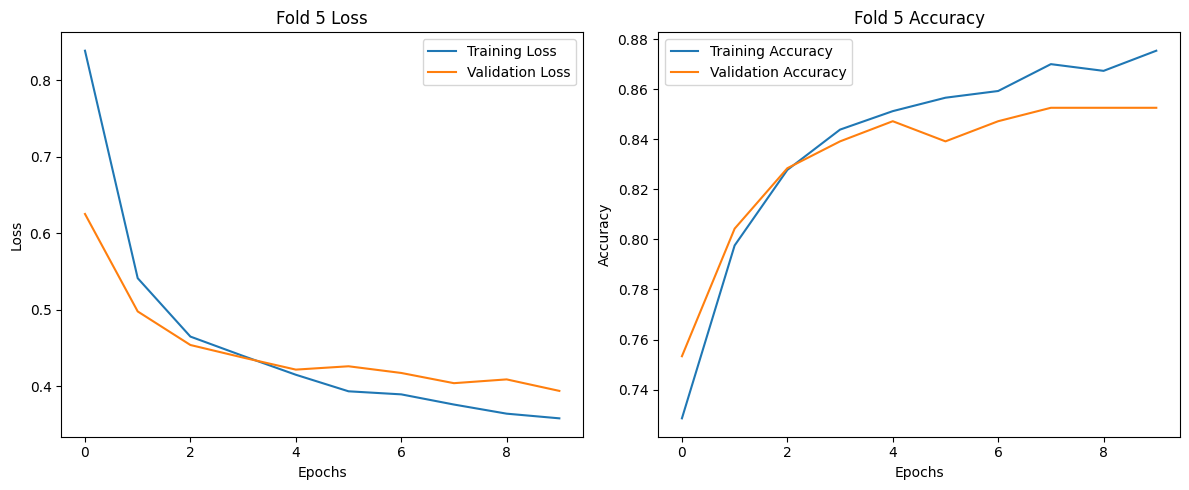

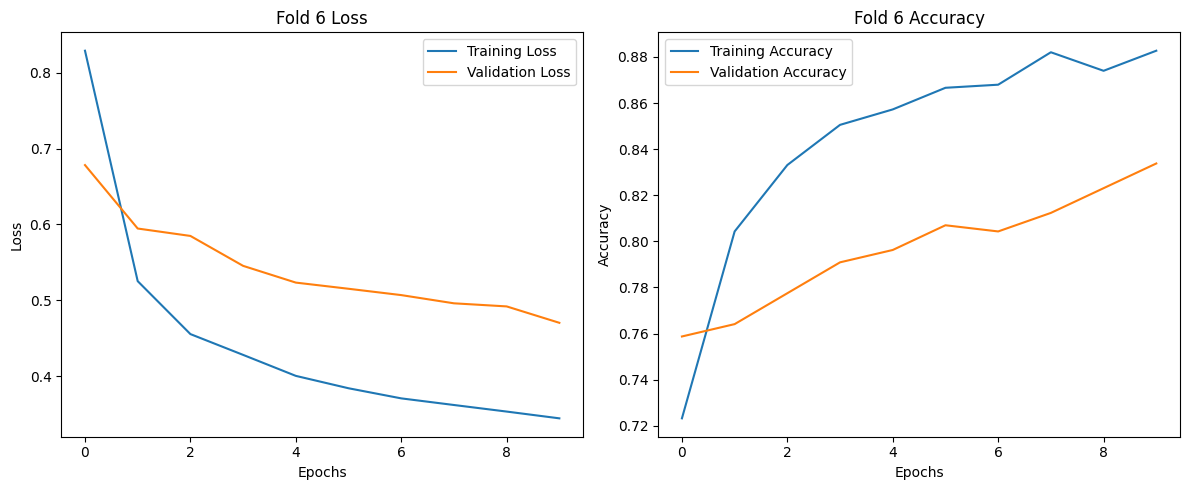

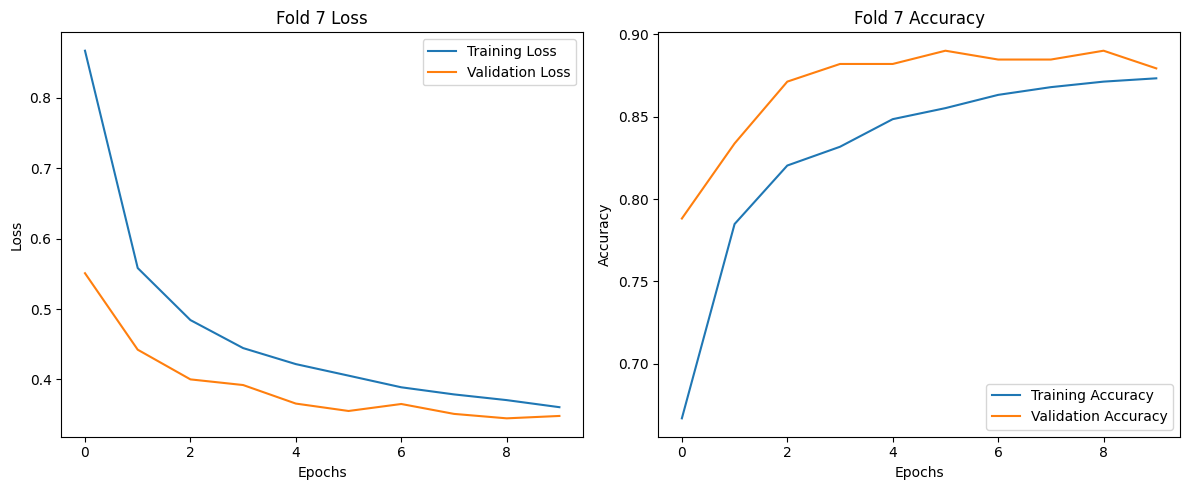

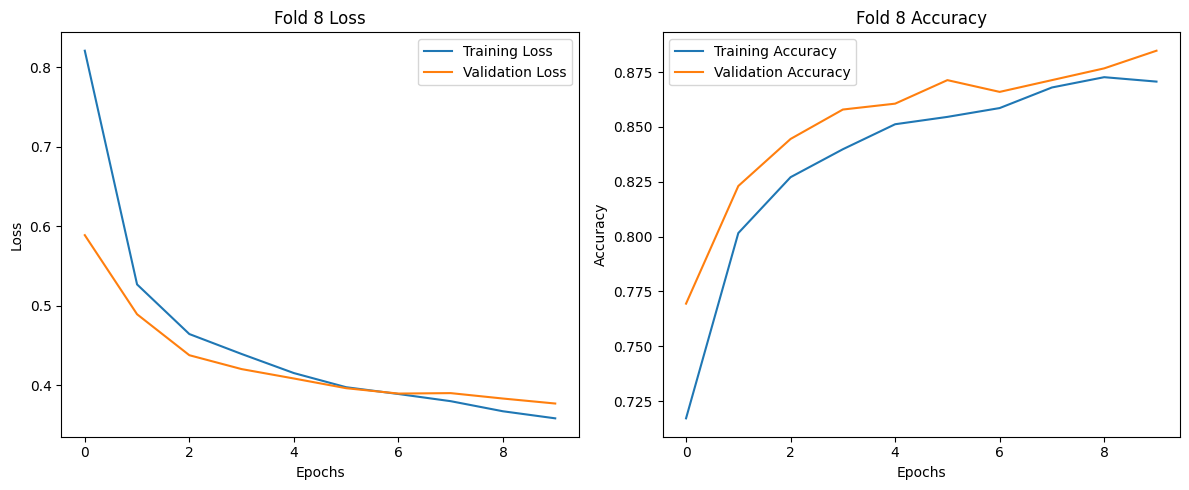

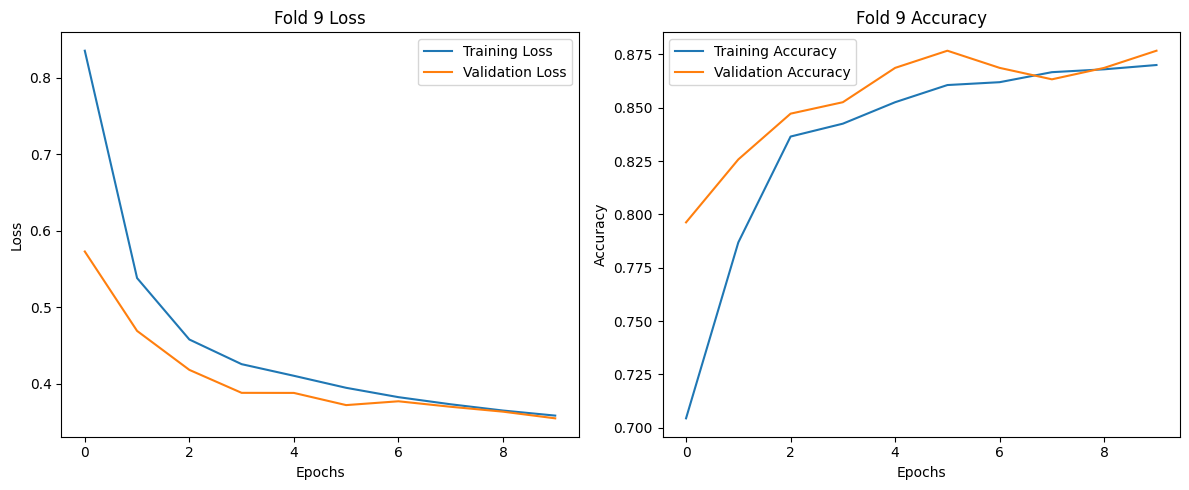

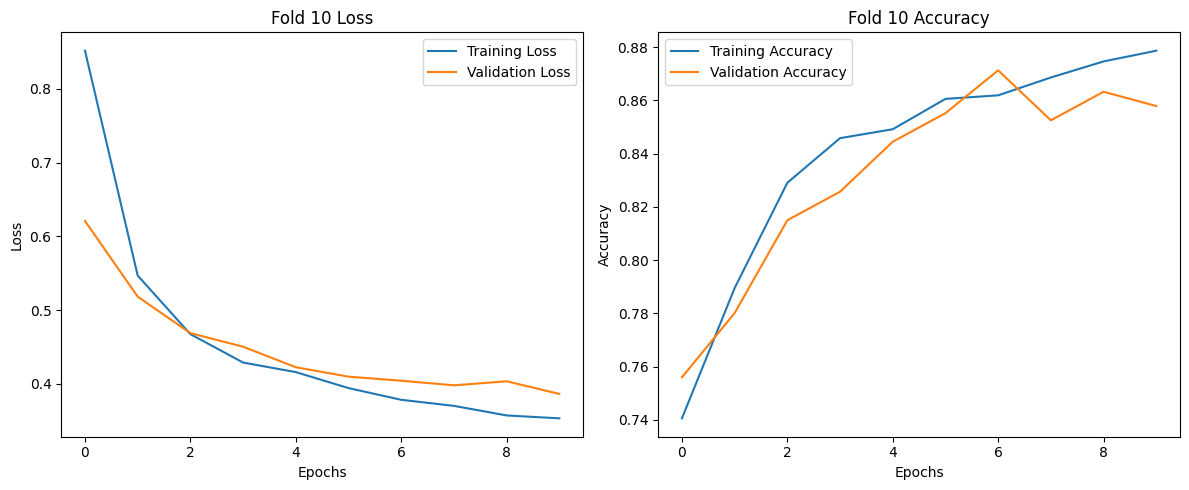

In [ ]:
import matplotlib.pyplot as plt

for i, history in enumerate(histories):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i+1} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i+1} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
average_val_accuracy = np.mean([history.history['val_accuracy'][-1] for history in histories])
average_val_loss = np.mean([history.history['val_loss'][-1] for history in histories])

print(f"Average Validation Accuracy: {average_val_accuracy * 100:.2f}%")
print(f"Average Validation Loss: {average_val_loss:.4f}")


Average Validation Accuracy: 86.30%
Average Validation Loss: 0.3921


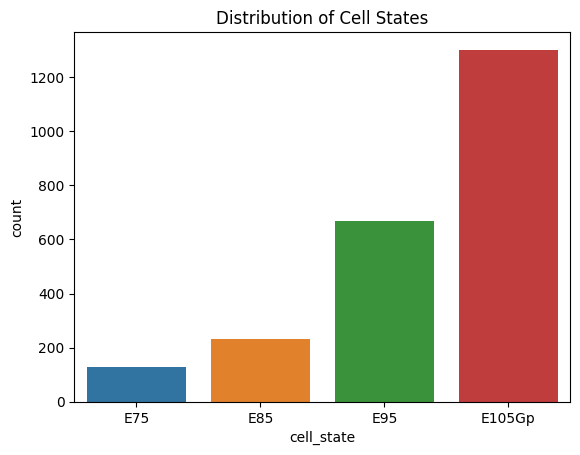

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the distribution of the 'cell_state' column
sns.countplot(x='cell_state', data=data)
plt.title('Distribution of Cell States')
plt.show()



Foxa2         0
cell_state    0
dtype: int64


TypeError: ignored

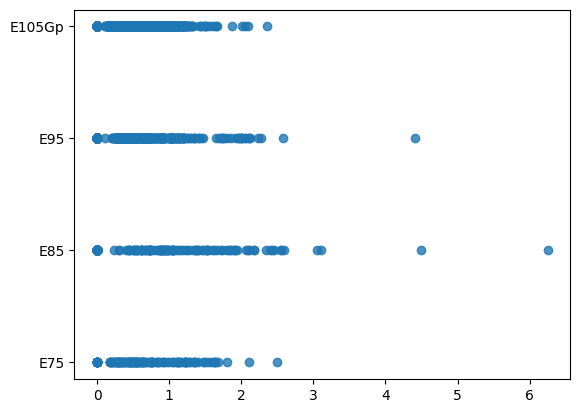

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with regression line
sns.regplot(x='Foxa2', y='cell_state', data=data, ci=None)  # ci=None removes the confidence interval
plt.title('Regression Analysis of Foxa2 vs. Cell State')
plt.show()


*Since cell_state is a categorical variable and you're interested in visualizing the relationships between the predictors and cell_state, box plots would be an excellent choice. Box plots allow you to see the central tendency and spread of each predictor for different categories of the cell_state.*

### Understanding the Box Plots: Predictors vs. Nucleotide Sequence Numbers (Cell State)

Note to **Natesh**

The series of box plots provided visualize the relationships between our chosen predictor variables (Foxa2, Foxa3, Hnf1a, Cebpa, Tbx3, Prox1, Hnf4a) and the `cell_state`, which, in this context, represents nucleotide sequence numbers.

Here's a breakdown of what you're seeing:

- **Box Plot Structure**: Each box represents the interquartile range (IQR), showcasing the 25th to 75th percentile of the `cell_state` distribution for each predictor's value. The line inside the box is the median. Whiskers extend to 1.5 times the IQR, and points outside of this range can be considered as outliers.

- **Predictors**: On the x-axis, each of our predictors is plotted. These are transcription factors that we believe may have an influence on the cell state.

- **Cell State Distribution**: On the y-axis, the distribution of the nucleotide sequence numbers is displayed. This allows us to understand how the `cell_state` varies with different levels of each predictor.

- **Interpretation**: By observing the median, spread, and outliers for each predictor, we can gauge the potential influence of each transcription factor on the nucleotide sequence number. A narrow box suggests less variability in sequence numbers for that predictor level, while a wider box indicates more variability.

Please note that while these plots provide a visual representation of potential relationships, further statistical analysis is required to ascertain the strength and nature of these relationships.


### Understanding Our Data in the Context of RNA-Seq

Our dataset, which includes predictors like Foxa2, Foxa3, Hnf1a, Cebpa, Tbx3, Prox1, and Hnf4a, and a target variable `cell_state` representing nucleotide sequence numbers, can be contextualized within the broader realm of RNA-Seq data in the following manner:

1. **Transcription Factor Expression**: The predictors in our dataset represent transcription factors. In RNA-Seq data, the expression levels of these transcription factors can be directly measured. Higher expression levels might indicate that a transcription factor is more active, while lower levels might suggest the opposite.

2. **Cell State & Nucleotide Sequences**: In our dataset, `cell_state` corresponds to nucleotide sequence numbers. In RNA-Seq, the sequence data informs us about which RNA molecules are present and in what quantities, giving a snapshot of cellular activity at any given moment.

3. **Relationship Exploration**: By examining the relationship between transcription factors and `cell_state`, we're essentially probing how changes in the expression levels of these factors might influence the nucleotide sequences or, more broadly, the transcriptomic profile of the cell.

4. **RNA-Seq as Ground Truth**: If our data is derived from or compared against RNA-Seq datasets, then RNA-Seq can serve as a "ground truth". This is because RNA-Seq provides a comprehensive view of the transcriptome, capturing all RNA molecules, including mRNAs, non-coding RNAs, and small RNAs.

5. **Interpretation for Biologists**: Think of our dataset as a focused lens on the massive landscape of RNA-Seq data. While RNA-Seq gives us a broad view of gene expression, our dataset narrows down the focus to specific genes (transcription factors) and their potential influence on particular nucleotide sequences or cellular states.

In summary, our data, when viewed in the light of RNA-Seq, offers a targeted exploration of the transcriptome, emphasizing the roles of select transcription factors and their potential regulatory effects on nucleotide sequences.


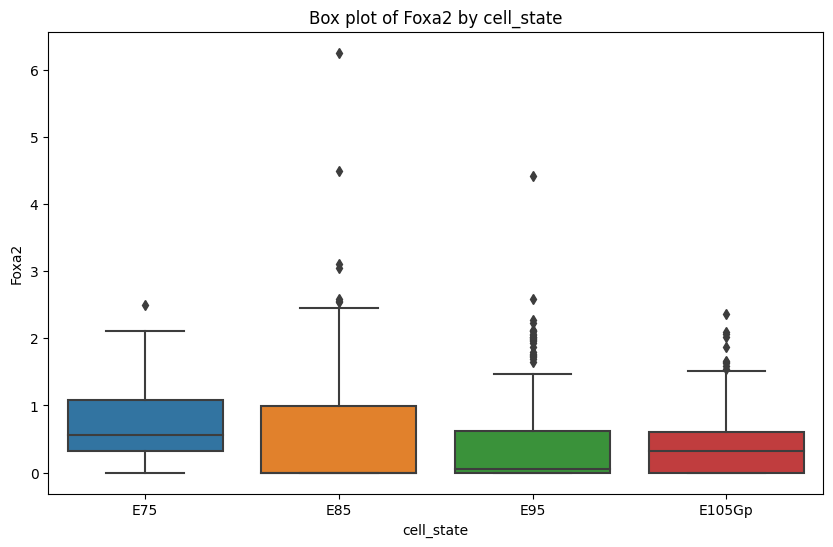

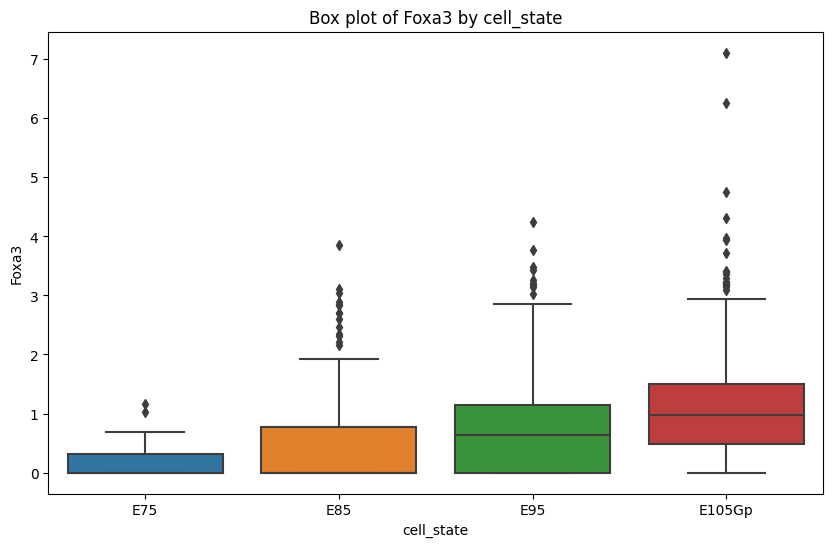

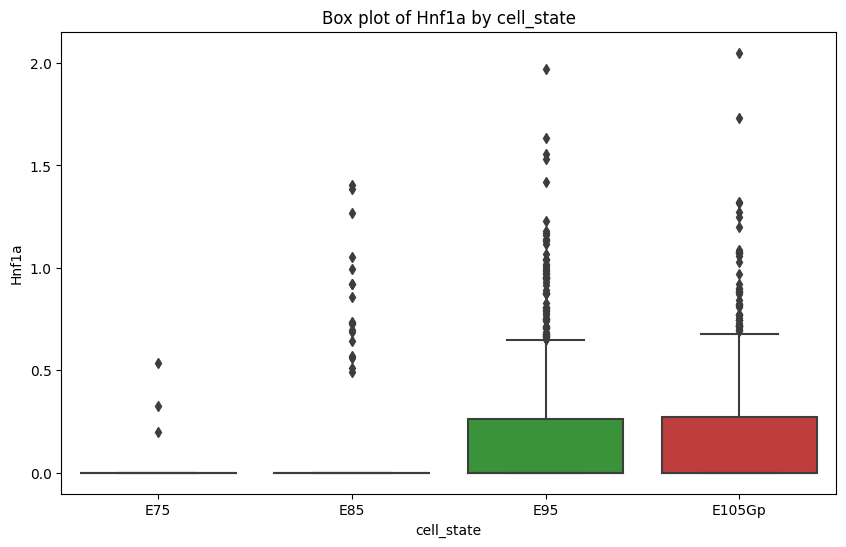

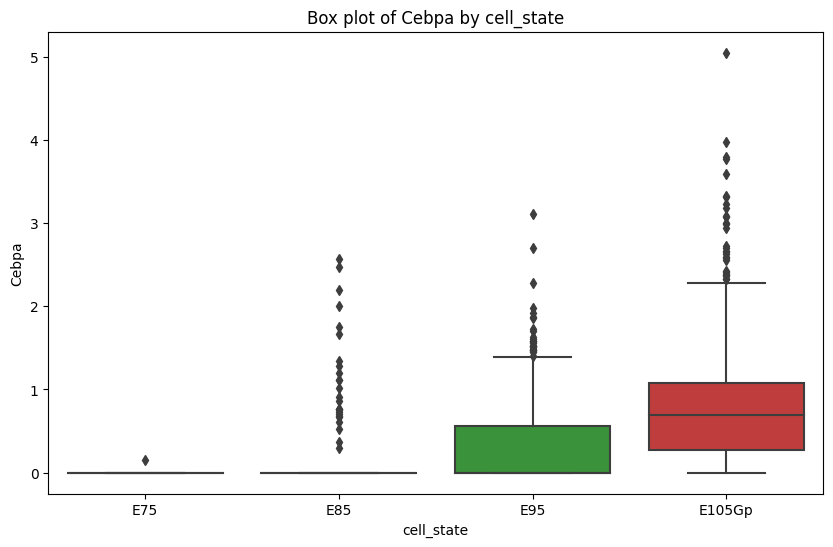

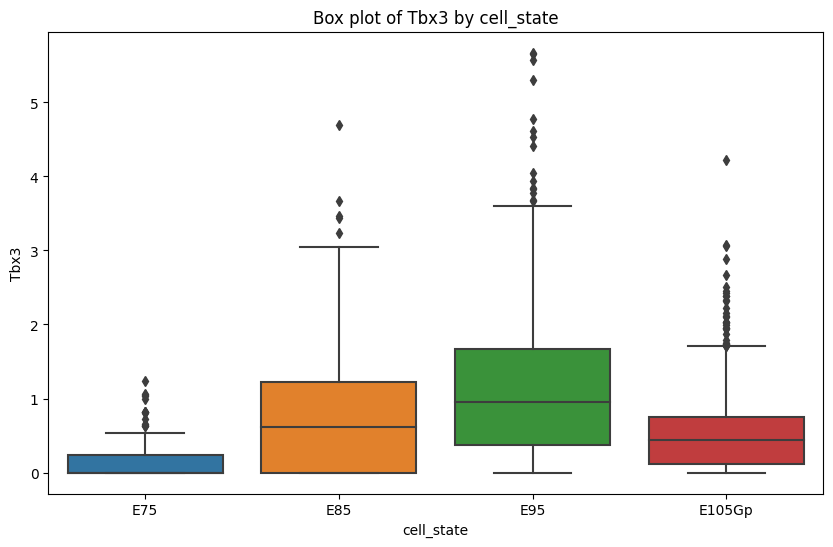

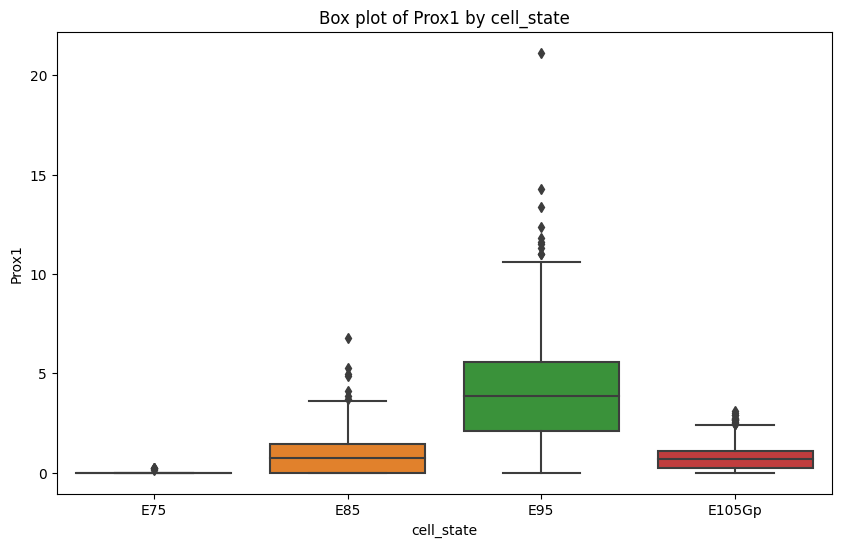

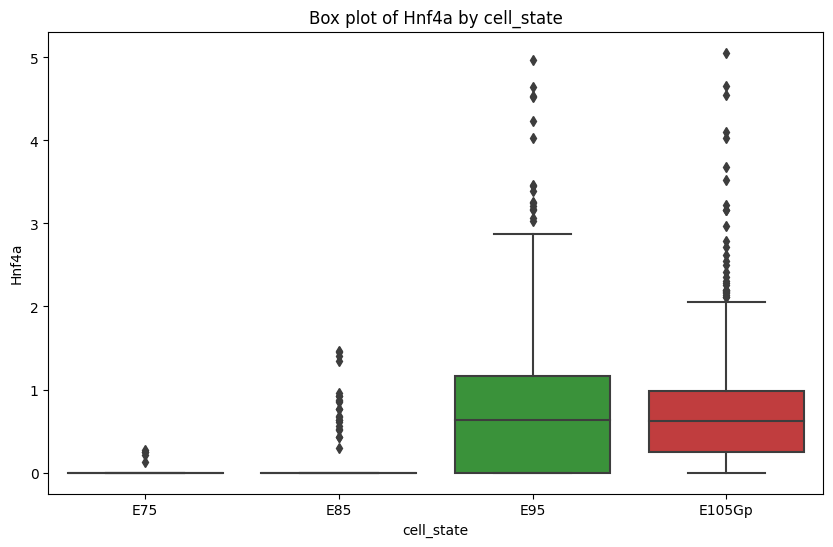

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of predictors
predictors = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']

for predictor in predictors:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cell_state', y=predictor, data=data)
    plt.title(f"Box plot of {predictor} by cell_state")
    plt.show()



In [ ]:
# Check if 'ALB' or 'Alb' is in the dataset
if 'ALB' in data.columns:
    print("'ALB' is in the dataset.")
elif 'Alb' in data.columns:
    print("'Alb' is in the dataset.")
else:
    print("Neither 'ALB' nor 'Alb' is in the dataset.")


'Alb' is in the dataset.


---

**To Natesh,**

Hey Natesh,

We're now investigating the relationship between various transcription factors and the gene `'Alb'`, which represents albumin in the dataset.

### Objective:
To understand how the levels of specific transcription factors (`'Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a'`) might influence or be associated with the expression levels of `'Alb'`.

### Methodology:
We are using **Multiple Linear Regression** for this. In this statistical technique, we have one dependent variable (`'Alb'` in this case) and multiple independent variables (the transcription factors). The goal is to model and analyze the relationships between the dependent and independent variables.

### What will this tell us?
The output from the regression analysis will provide:

- **Coefficients**: How much does `'Alb'` change for a unit change in each transcription factor while holding others constant?
- **p-values**: Are the observed relationships statistically significant or could they be by random chance?
- **R-squared**: How well do our transcription factors explain the variability in `'Alb'` levels?

From this, we can gather which transcription factors are most influential for `'Alb'` expression and potentially infer some biological relevance from these findings.

---


In [ ]:
import statsmodels.api as sm

# Define predictors
predictors = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']
X = data[predictors]

# Add a constant to the model (it's a best practice!)
X = sm.add_constant(X)

# Define outcome
y = data['Alb']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    Alb   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     94.84
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          5.06e-122
Time:                        03:38:44   Log-Likelihood:                -8167.6
No. Observations:                2332   AIC:                         1.635e+04
Df Residuals:                    2324   BIC:                         1.640e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7357      0.340      8.056      0.0

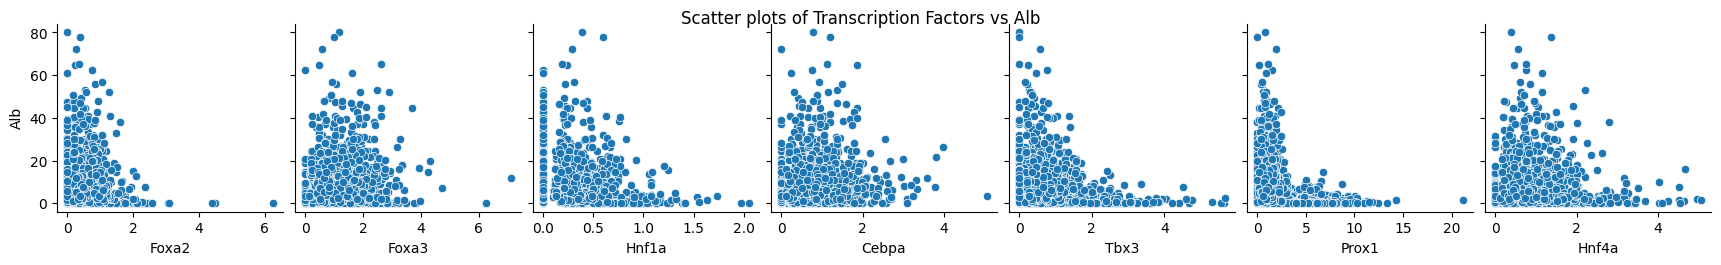

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to be visualized
cols = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a', 'Alb']

# Plotting
sns.pairplot(data[cols], y_vars=['Alb'], x_vars=['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a'])
plt.suptitle('Scatter plots of Transcription Factors vs Alb', y=1.02)
plt.show()


In [ ]:
# Function to check variations in the naming conventions for each gene
def check_gene_presence(gene_name, dataset):
    variations = [gene_name.upper(), gene_name.capitalize(), gene_name.lower()]
    for variation in variations:
        if variation in dataset.columns:
            return f"'{variation}' is in the dataset."
    return f"None of the variations of '{gene_name}' are in the dataset."

# Check for each gene
print(check_gene_presence('AFP', data))
print(check_gene_presence('APOA1', data))
print(check_gene_presence('TTR', data))


'Afp' is in the dataset.
None of the variations of 'APOA1' are in the dataset.
None of the variations of 'TTR' are in the dataset.


In [ ]:
# Function to check variations in the naming conventions for each gene
def check_gene_presence(gene_name, dataset):
    variations = [gene_name.upper(), gene_name.capitalize(), gene_name.lower()]
    for variation in variations:
        if variation in dataset.columns:
            return f"'{variation}' is in the dataset."
    return f"None of the variations of '{gene_name}' are in the dataset."

# Check for each gene
print(check_gene_presence('AFP', data))
print(check_gene_presence('APOA1', data))
print(check_gene_presence('ApoA1', data))
print(check_gene_presence('TTR', data))


'Afp' is in the dataset.
None of the variations of 'APOA1' are in the dataset.
None of the variations of 'ApoA1' are in the dataset.
None of the variations of 'TTR' are in the dataset.


In [ ]:
import statsmodels.api as sm

# Define the predictors and the target variable
predictors = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']
X = data[predictors]
y = data['Afp']

# Adding a constant to the model (intercept)
X = sm.add_constant(X)

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Displaying the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    Afp   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          5.32e-184
Time:                        03:57:41   Log-Likelihood:                -11941.
No. Observations:                2332   AIC:                         2.390e+04
Df Residuals:                    2324   BIC:                         2.394e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5064      1.713     13.723      0.0

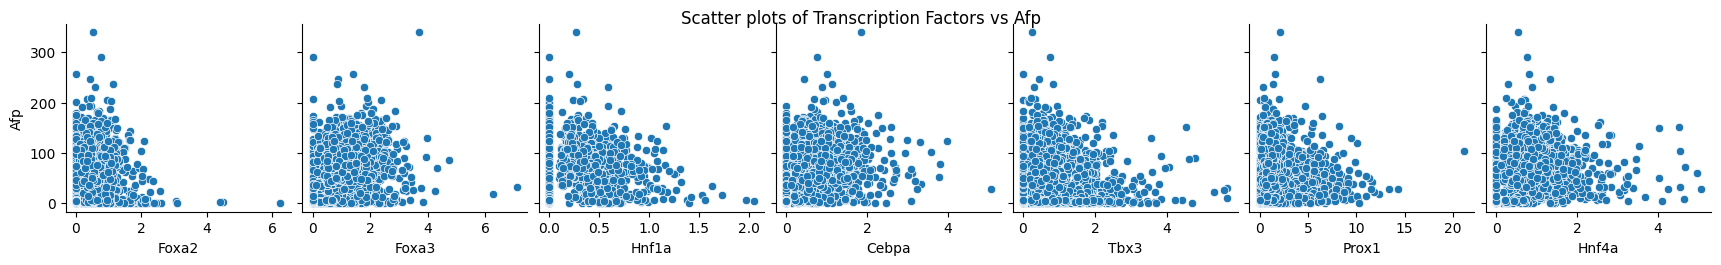

In [ ]:
# List of columns to be visualized
cols = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a', 'Afp']

# Plotting
sns.pairplot(data[cols], y_vars=['Afp'], x_vars=['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a'])
plt.suptitle('Scatter plots of Transcription Factors vs Afp', y=1.02)
plt.show()




Regression results for Afp:
                            OLS Regression Results                            
Dep. Variable:                    Afp   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 15 Oct 2023   Prob (F-statistic):          5.32e-184
Time:                        04:13:13   Log-Likelihood:                -11941.
No. Observations:                2332   AIC:                         2.390e+04
Df Residuals:                    2324   BIC:                         2.394e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5064   

## Multivariate Multiple Regression Analysis

In our previous analyses, we ran multiple regression models where we predicted one dependent variable (`Alb` or `Afp`) using multiple independent transcription factors. However, in the recent analysis, we adopted a slightly different approach known as **Multivariate Multiple Regression**. Here, we simultaneously predicted two dependent variables (`Alb` and `Afp`) using the transcription factors as independent variables.

### Results:

**Predicting Alb:**
- **Foxa2:** 0.03998226
- **Foxa3:** 2.61312817
- **Hnf1a:** 1.85277447
- **Cebpa:** 3.34476929
- **Tbx3:** -1.11774812
- **Prox1:** -0.74322116
- **Hnf4a:** 1.53291737

**Predicting Afp:**
- **Foxa2:** -0.52381577
- **Foxa3:** 17.22965553
- **Hnf1a:** 13.16554166
- **Cebpa:** 22.01277841
- **Tbx3:** -2.85461716
- **Prox1:** -1.33774192
- **Hnf4a:** 13.00331925

### Interpretation:

Each coefficient represents the change in the dependent variable for a one-unit change in the predictor while holding other predictors constant. For instance, for predicting `Alb`, a one-unit increase in `Foxa2` is associated with an increase of 0.03998226 in `Alb`, assuming all other transcription factors remain constant.

It's crucial to note that this multivariate approach allows for potentially capturing the shared variance in the prediction of both `Alb` and `Afp`. The coefficients may differ from those derived from separate regressions due to this shared variance consideration.

Lastly, the magnitude and direction (positive/negative) of each coefficient provide insights into the relationships between the transcription factors and the dependent variables. For instance, `Cebpa` has a strong positive relationship with both `Alb` and `Afp`, while `Tbx3` has a negative association.


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression

# Independent Variables
X = data[['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']].values

# Dependent Variables
y = data[['Alb', 'Afp']].values

# Setup the multi-output regression
model = MultiOutputRegressor(LinearRegression()).fit(X, y)

# Get coefficients
coefs_Alb = model.estimators_[0].coef_
coefs_Afp = model.estimators_[1].coef_

print("Coefficients for predicting Alb:")
print(coefs_Alb)
print("\nCoefficients for predicting Afp:")
print(coefs_Afp)


Coefficients for predicting Alb:
[ 0.03998226  2.61312817  1.85277447  3.34476929 -1.11774812 -0.74322116
  1.53291737]

Coefficients for predicting Afp:
[-0.52381577 17.22965553 13.16554166 22.01277841 -2.85461716 -1.33774192
 13.00331925]


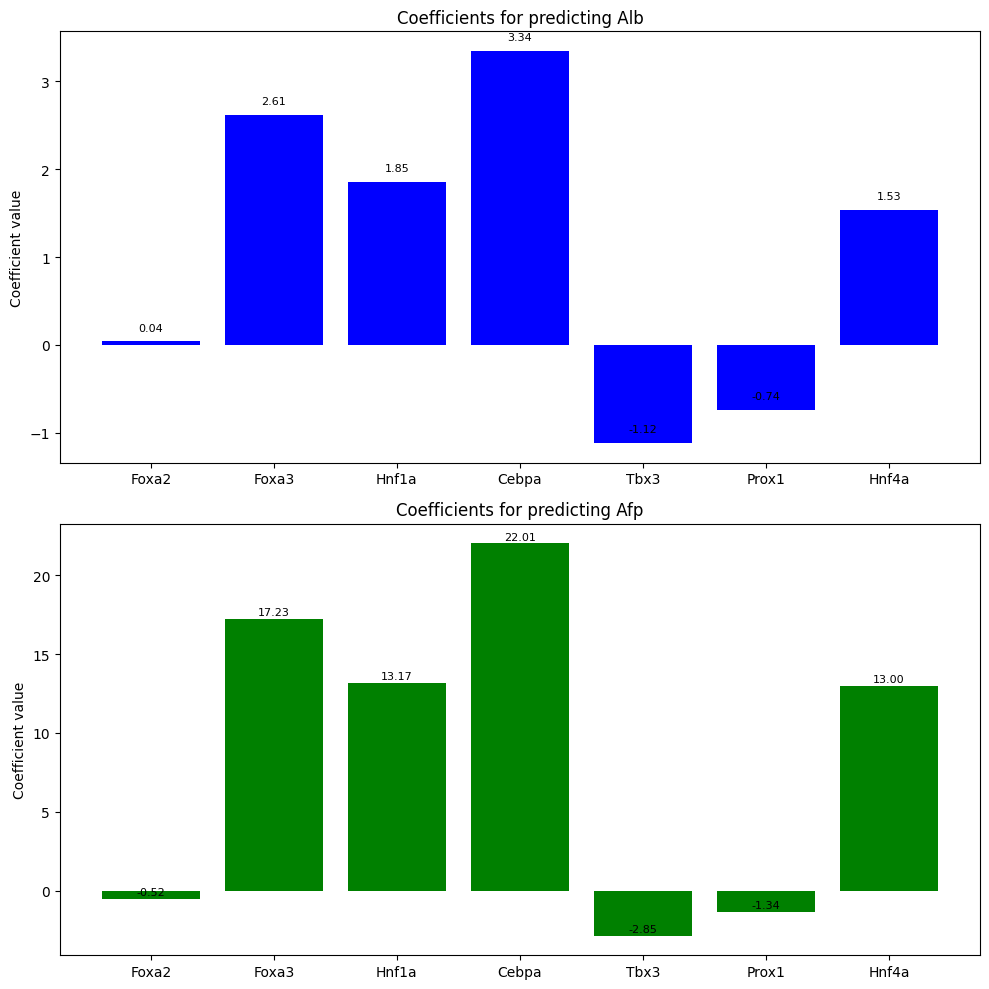

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Transcription factors
transcription_factors = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']

# Coefficients for predicting Alb and Afp
coefficients_alb = [0.03998226, 2.61312817, 1.85277447, 3.34476929, -1.11774812, -0.74322116, 1.53291737]
coefficients_afp = [-0.52381577, 17.22965553, 13.16554166, 22.01277841, -2.85461716, -1.33774192, 13.00331925]

# Set up the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

# Plot for Alb
ax[0].bar(transcription_factors, coefficients_alb, color='blue')
ax[0].set_title('Coefficients for predicting Alb')
ax[0].set_ylabel('Coefficient value')
for i, v in enumerate(coefficients_alb):
    ax[0].text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom', fontsize=8)

# Plot for Afp
ax[1].bar(transcription_factors, coefficients_afp, color='green')
ax[1].set_title('Coefficients for predicting Afp')
ax[1].set_ylabel('Coefficient value')
for i, v in enumerate(coefficients_afp):
    ax[1].text(i, v + 0.1, f"{v:.2f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


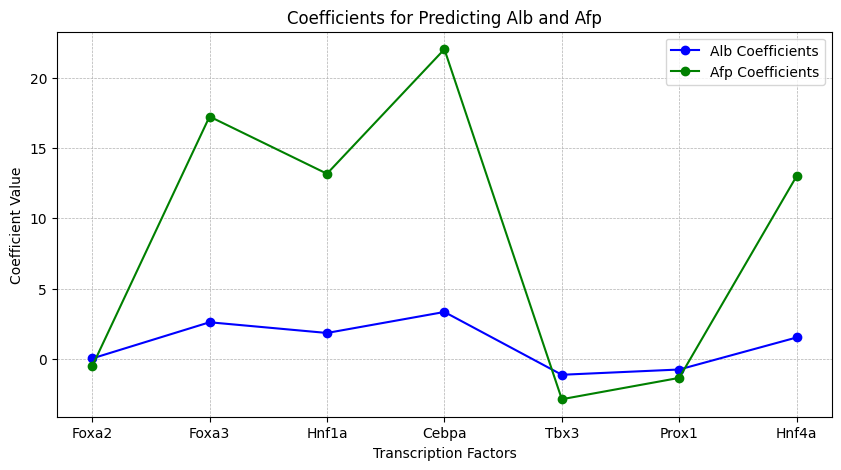

In [ ]:
import matplotlib.pyplot as plt

# Transcription factors
transcription_factors = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']

# Coefficients for predicting Alb and Afp
coefficients_alb = [0.03998226, 2.61312817, 1.85277447, 3.34476929, -1.11774812, -0.74322116, 1.53291737]
coefficients_afp = [-0.52381577, 17.22965553, 13.16554166, 22.01277841, -2.85461716, -1.33774192, 13.00331925]

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(transcription_factors, coefficients_alb, marker='o', label='Alb Coefficients', color='blue')
plt.plot(transcription_factors, coefficients_afp, marker='o', label='Afp Coefficients', color='green')
plt.xlabel('Transcription Factors')
plt.ylabel('Coefficient Value')
plt.title('Coefficients for Predicting Alb and Afp')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


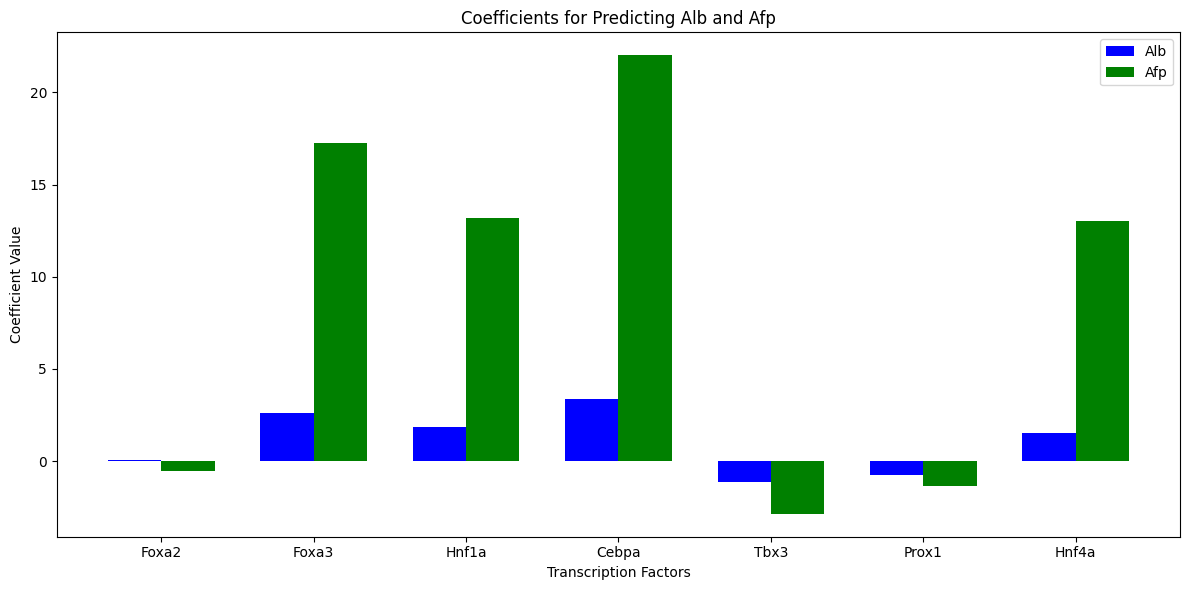

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Transcription factors
transcription_factors = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']

# Coefficients for predicting Alb and Afp
coefficients_alb = [0.03998226, 2.61312817, 1.85277447, 3.34476929, -1.11774812, -0.74322116, 1.53291737]
coefficients_afp = [-0.52381577, 17.22965553, 13.16554166, 22.01277841, -2.85461716, -1.33774192, 13.00331925]

bar_width = 0.35
index = np.arange(len(transcription_factors))

# Plotting
plt.figure(figsize=(12, 6))
bar1 = plt.bar(index, coefficients_alb, bar_width, color='b', label='Alb')
bar2 = plt.bar(index + bar_width, coefficients_afp, bar_width, color='g', label='Afp')

plt.xlabel('Transcription Factors')
plt.ylabel('Coefficient Value')
plt.title('Coefficients for Predicting Alb and Afp')
plt.xticks(index + bar_width / 2, transcription_factors)  # Positioning the labels in the center of the grouped bars
plt.legend()
plt.tight_layout()

plt.show()


**I've seen you do this kind of plot before**

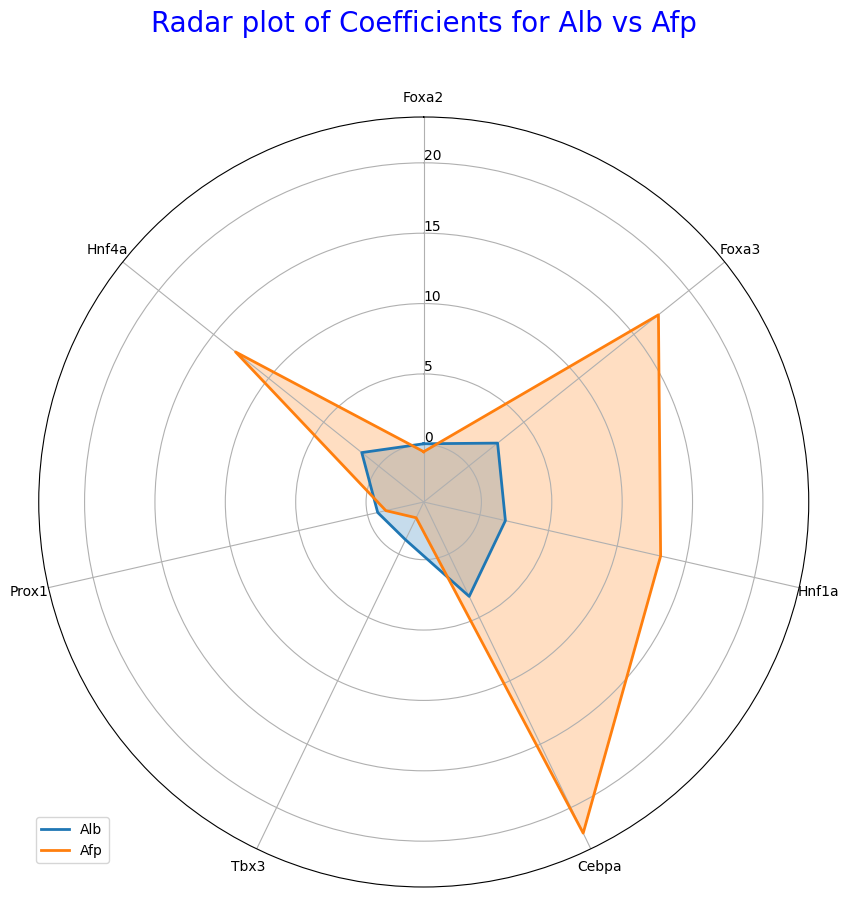

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Transcription factors
transcription_factors = ['Foxa2', 'Foxa3', 'Hnf1a', 'Cebpa', 'Tbx3', 'Prox1', 'Hnf4a']

# Coefficients for predicting Alb and Afp
coefficients_alb = [0.03998226, 2.61312817, 1.85277447, 3.34476929, -1.11774812, -0.74322116, 1.53291737]
coefficients_afp = [-0.52381577, 17.22965553, 13.16554166, 22.01277841, -2.85461716, -1.33774192, 13.00331925]

# To close the radar chart, append the start value to the end
coefficients_alb += coefficients_alb[:1]
coefficients_afp += coefficients_afp[:1]

# Set data
angles = [n / float(len(transcription_factors)) * 2 * np.pi for n in range(len(transcription_factors))]
angles += angles[:1]

# Initialize the spider plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Draw the outline of our data for 'Alb' and 'Afp'
ax.plot(angles, coefficients_alb, linewidth=2, linestyle='solid', label='Alb')
ax.fill(angles, coefficients_alb, alpha=0.25)
ax.plot(angles, coefficients_afp, linewidth=2, linestyle='solid', label='Afp')
ax.fill(angles, coefficients_afp, alpha=0.25)

# Add a title
plt.title('Radar plot of Coefficients for Alb vs Afp', size=20, color='blue', y=1.1)

# Add legend and grid
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)

# Set the labels for each angle
ax.set_xticks(angles[:-1])
ax.set_xticklabels(transcription_factors)

plt.show()
